<a href="https://colab.research.google.com/github/toanchitran/tensorflow/blob/master/carvana_image_masking_challenge_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we will be using the [Kaggle Carvana Image Masking Challenge Dataset](https://www.kaggle.com/c/carvana-image-masking-challenge).

In [1]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 5.2MB/s 
    100% |████████████████████████████████| 235kB 13.4MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
import os
def get_kaggle_credentials():
  token_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
  token_file = os.path.join(token_dir, "kaggle.json")
  if not os.path.isdir(token_dir):
    os.mkdir(token_dir)
  try:
    with open(token_file, 'r') as f:
      pass
  except IOError as no_file:
    try:
      from google.colab import files
    except ImportError:
      raise no_file
      
    uploaded = files.upload()
    
    if "kaggle.json" not in uploaded:
      raise ValueError("You need a Kaggle API")
    with open(token_file, "wb") as f:
      f.write(uploaded["kaggle.json"])
    os.chmod(token_file, 600)

In [4]:
get_kaggle_credentials()

Saving kaggle.json to kaggle.json


In [0]:
import kaggle
import zipfile

competition_name = 'carvana-image-masking-challenge'

def load_data_from_zip(competition, file):
  with zipfile.ZipFile(os.path.join(competition, file), "r") as zip_ref:
    unzipped_file = zip_ref.namelist()[0]
    zip_ref.extractall(competition)
    
def get_data(competition):
  kaggle.api.competition_download_files(competition, competition)
  load_data_from_zip(competition, "train.zip")
  load_data_from_zip(competition, "train_masks.zip")
  load_data_from_zip(competition, "train_masks.csv.zip")
  
get_data(competition_name)

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)
from sklearn.model_selection import train_test_split


In [3]:
import os
img_dir = os.path.join(competition_name, "train")
label_dir = os.path.join(competition_name, "train_masks")

df_train = pd.read_csv(os.path.join(competition_name, "train_masks.csv"))
ids_train = df_train['img'].map(lambda x: x.split('.')[0])

NameError: ignored

In [0]:
x_train_filenames = []
y_train_filenames = []

for img_id in ids_train:
  x_train_filenames.append(os.path.join(img_dir, "{}.jpg".format(img_id)))
  y_train_filenames.append(os.path.join(label_dir, "{}_mask.gif".format(img_id)))
  
x_train_filenames, x_val_filenames, y_train_filenames, y_val_filenames = train_test_split(x_train_filenames, y_train_filenames, test_size=0.2, random_state=42)

In [9]:
x_train_filenames[:10]

['carvana-image-masking-challenge/train/69915dab0755_16.jpg',
 'carvana-image-masking-challenge/train/695f39dfac16_04.jpg',
 'carvana-image-masking-challenge/train/2267f4aa0d2c_13.jpg',
 'carvana-image-masking-challenge/train/562706000bd7_15.jpg',
 'carvana-image-masking-challenge/train/917f262f1608_06.jpg',
 'carvana-image-masking-challenge/train/fce0ba5b8ed7_07.jpg',
 'carvana-image-masking-challenge/train/93881caf9f70_10.jpg',
 'carvana-image-masking-challenge/train/eb07e3f63ad2_09.jpg',
 'carvana-image-masking-challenge/train/78bfb9c780db_10.jpg',
 'carvana-image-masking-challenge/train/d3d0d2662918_12.jpg']

In [10]:
y_train_filenames[:10]

['carvana-image-masking-challenge/train_masks/69915dab0755_16_mask.gif',
 'carvana-image-masking-challenge/train_masks/695f39dfac16_04_mask.gif',
 'carvana-image-masking-challenge/train_masks/2267f4aa0d2c_13_mask.gif',
 'carvana-image-masking-challenge/train_masks/562706000bd7_15_mask.gif',
 'carvana-image-masking-challenge/train_masks/917f262f1608_06_mask.gif',
 'carvana-image-masking-challenge/train_masks/fce0ba5b8ed7_07_mask.gif',
 'carvana-image-masking-challenge/train_masks/93881caf9f70_10_mask.gif',
 'carvana-image-masking-challenge/train_masks/eb07e3f63ad2_09_mask.gif',
 'carvana-image-masking-challenge/train_masks/78bfb9c780db_10_mask.gif',
 'carvana-image-masking-challenge/train_masks/d3d0d2662918_12_mask.gif']

Number of training examples: 4070
Number of validation: 1018


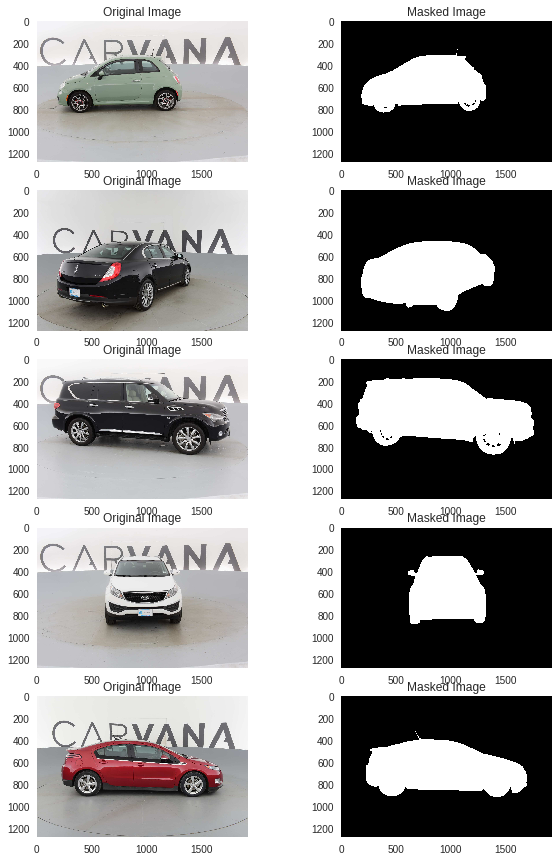

In [11]:
display_num = 5

num_train_examples = len(x_train_filenames)
num_val_examples = len(x_val_filenames)

print("Number of training examples: {}".format(num_train_examples))
print("Number of validation: {}".format(num_val_examples))

r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize=(10,15))

for i in range(0, display_num*2, 2):
  
  img_num = r_choices[i//2]
  x_pathname = x_train_filenames[img_num]
  y_pathname = y_train_filenames[img_num]
  
  plt.subplot(display_num, 2, i+1)
  plt.imshow(mpimg.imread(x_pathname))
  plt.title("Original Image")
  
  example_labels = Image.open(y_pathname)
  label_val = np.unique(example_labels)
  
  plt.subplot(display_num, 2, i+2)
  plt.imshow(example_labels)
  plt.title("Masked Image")
  
  
plt.show()

# Data augmentation

Apply image transformations: (optional, according to input parameters)


*   resize - Resize our images to a standard size (as determined by eda or computation/memory restrictions)
*   hue_delta - Adjusts the hue of an RGB image by a random factor. This is only applied to the actual image (not our label image). The hue_delta must be in the interval [0, 0.5]


*   horizontal_flip - flip the image horizontally along the central axis with a 0.5 probability. This transformation must be applied to both the label and the actual image.
*   width_shift_range and height_shift_range are ranges (as a fraction of total width or height) within which to randomly translate the image either horizontally or vertically. This transformation must be applied to both the label and the actual image.
*    rescale - rescale the image by a certain factor, e.g. 1/ 255.


In [0]:
img_shape = (256,256,3)
batch_size = 5
epochs = 10

In [0]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers, losses, models
from tensorflow.python.keras import backend as K
import glob
import functools

In [0]:
def _process_pathnames(fname, label_path):
  img_str = tf.read_file(fname)
  img = tf.image.decode_jpeg(img_str, channels=3)
  
  label_img_str = tf.read_file(label_path)
  label_img = tf.image.decode_gif(label_img_str)[0]
  
  label_img = label_img[:,:,0]
  label_img = tf.expand_dims(label_img, axis=-1)
  return img, label_img

def shift_img(output_img, label_img, width_shift_range, height_shift_range):
  if width_shift_range or height_shift_range:
    if width_shift_range:
      width_shift_range = tf.random_uniform([], -width_shift_range * img_shape[1], width_shift_range * img_shape[1])
    if height_shift_range:
      height_shift_range = tf.random_uniform([], -height_shift_range * img_shape[0], height_shift_range*img_shape[0])
    output_img = tfcontrib.image.translate(output_img, [width_shift_range, height_shift_range])
    label_img = tfcontrib.image.translate(label_img, [width_shift_range, height_shift_range])
  return output_img, label_img

def flip_img(horizontal_flip, tr_img, label_img):
  if horizontal_flip:
    flip_prob = tf.random_uniform([], 0.0, 1.0)
    tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img)
                               )
  return tr_img, label_img

def _augment(img,
             label_img,
             resize=None, # Resize image to some size e.g. [512,512]
             scale=1, # Scale image e.g. 1/255
             hue_delta=0, # Adjust the hue of an RGB image by random factor
             horizontal_flip=False, # Random left right flip
             width_shift_range=0, # Random translate the image horizontally
             height_shift_range=0 # Random translate the image vertically
            ):
  if resize is not None:
    label_img = tf.image.resize_images(label_img, resize)
    img = tf.image.resize_images(img, resize)
  if hue_delta:
    img = tf.image.random_hue(img, hue_delta)
  img, label_img = flip_img(horizontal_flip, img, label_img)
  img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
  label_img = tf.to_float(label_img)*scale
  img = tf.to_float(img)*scale
  return img, label_img

def get_baseline_dataset(filenames, 
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=5, 
                         batch_size=batch_size,
                         shuffle=True):           
  num_x = len(filenames)
  # Create a dataset from the filenames and labels
  dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
  # Map our preprocessing function to every element in our dataset, taking
  # advantage of multithreading
  dataset = dataset.map(_process_pathnames, num_parallel_calls=threads)
  if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
    assert batch_size == 1, "Batching images must be of the same size"

  dataset = dataset.map(preproc_fn, num_parallel_calls=threads)
  
  if shuffle:
    dataset = dataset.shuffle(num_x)
  
  
  # It's necessary to repeat our data for all epochs 
  dataset = dataset.repeat().batch(batch_size)
  return dataset

In [0]:
tr_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1/255,
    'hue_delta': 0.1,
    'horizontal_flip': True, 
    'width_shift_range': 0.1,
    'height_shift_range': 0.1}
val_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1/255}
tr_preprocessing_fn = functools.partial(_augment, **tr_cfg)
val_preprocessing_fn = functools.partial(_augment, **val_cfg)

train_ds = get_baseline_dataset(x_train_filenames,
                                y_train_filenames,
                                preproc_fn=tr_preprocessing_fn,
                                batch_size=batch_size)
val_ds = get_baseline_dataset(x_val_filenames,
                              y_val_filenames, 
                              preproc_fn=val_preprocessing_fn,
                              batch_size=batch_size)

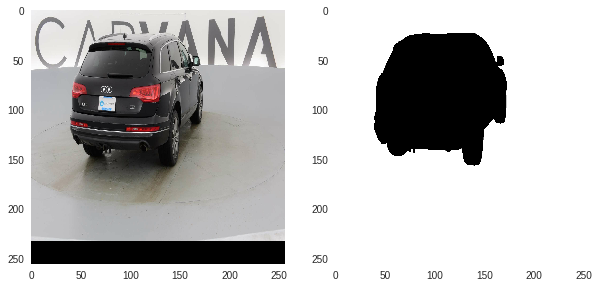

In [16]:
temp_ds = get_baseline_dataset(x_train_filenames,
                              y_train_filenames,
                              preproc_fn=tr_preprocessing_fn,
                              batch_size=batch_size)
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()
with tf.Session() as sess: 
  batch_of_imgs, label = sess.run(next_element)

  # Running next element in our graph will produce a batch of images
  plt.figure(figsize=(10, 10))
  img = batch_of_imgs[0]

  plt.subplot(1, 2, 1)
  plt.imshow(img)

  plt.subplot(1, 2, 2)
  plt.imshow(label[0, :, :, 0])
  plt.show()

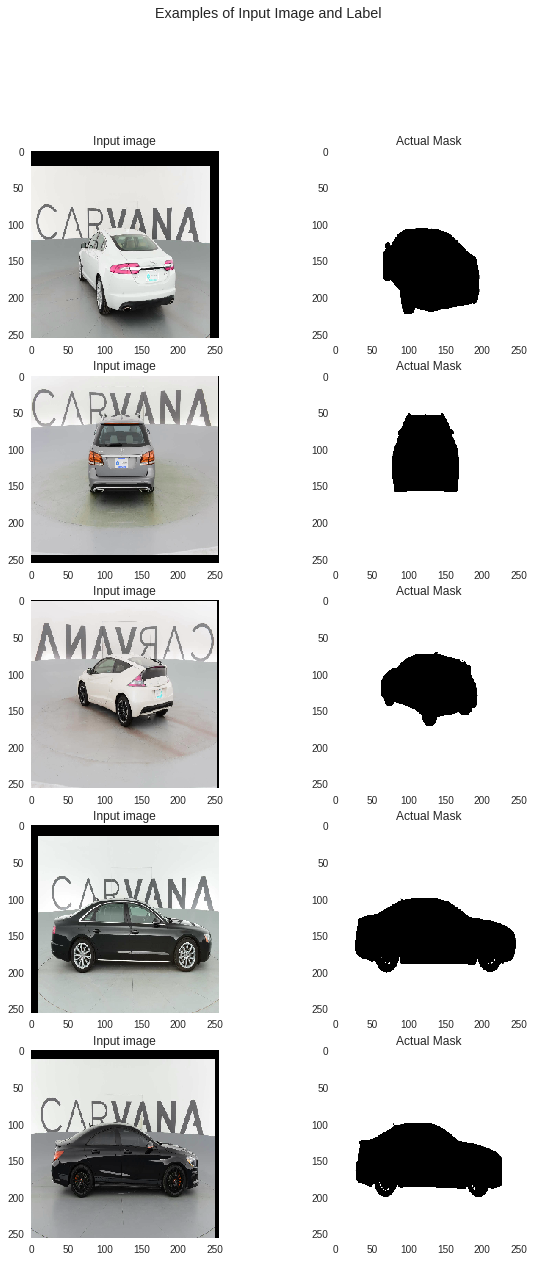

In [18]:
temp_ds = get_baseline_dataset(x_train_filenames,
                              y_train_filenames,
                              preproc_fn=tr_preprocessing_fn,
                              batch_size=batch_size)
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()


# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
  batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
  img = batch_of_imgs[0]
  
  plt.subplot(5, 2, 2 * i + 1)
  plt.imshow(img)
  plt.title("Input image")
  
  plt.subplot(5, 2, 2 * i + 2)
  plt.imshow(label[0, :, :, 0])
  plt.title("Actual Mask")

plt.suptitle("Examples of Input Image and Label")
plt.show()

In [0]:
def conv_block(input_tensor, num_filters):
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  return encoder

def encoder_block(input_tensor, num_filters):
  encoder = conv_block(input_tensor, num_filters)
  encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
  
  return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
  decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
  decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  return decoder

In [0]:
inputs = layers.Input(shape=img_shape)
# 256

encoder0_pool, encoder0 = encoder_block(inputs, 32)
# 128

encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
# 64

encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
# 32

encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
# 16

encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
# 8

center = conv_block(encoder4_pool, 1024)
# center

decoder4 = decoder_block(center, encoder4, 512)
# 16

decoder3 = decoder_block(decoder4, encoder3, 256)
# 32

decoder2 = decoder_block(decoder3, encoder2, 128)
# 64

decoder1 = decoder_block(decoder2, encoder1, 64)
# 128

decoder0 = decoder_block(decoder1, encoder0, 32)
# 256

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)

In [0]:
model = models.Model(inputs=[inputs], outputs=[outputs])

In [0]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score
  
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [0]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [24]:
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [0]:
save_model_path = 'weights.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)

In [0]:
history = model.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp])

Epoch 1/10


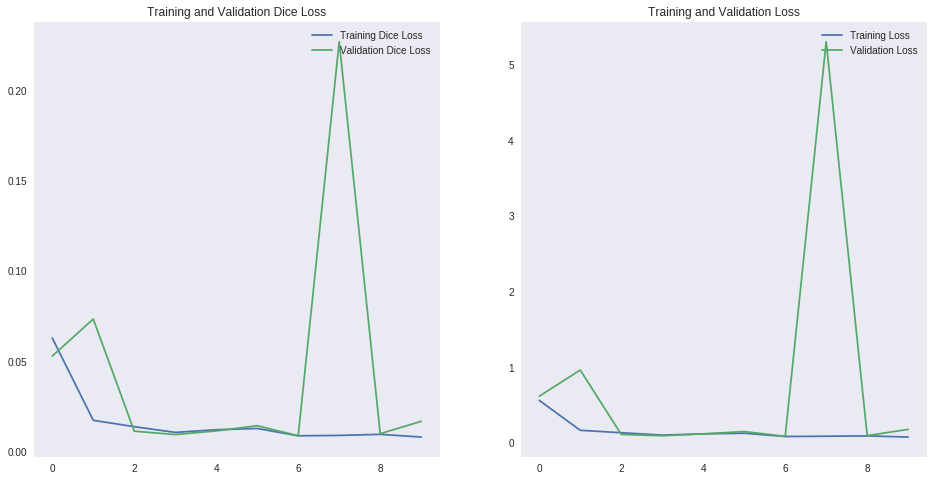

In [24]:
dice = history.history['dice_loss']
val_dice = history.history['val_dice_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, dice, label='Training Dice Loss')
plt.plot(epochs_range, val_dice, label='Validation Dice Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Dice Loss')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [0]:
model = models.load_model(save_model_path, custom_objects = {'bce_dice_loss': bce_dice_loss,
                                                            'dice_loss': dice_loss})

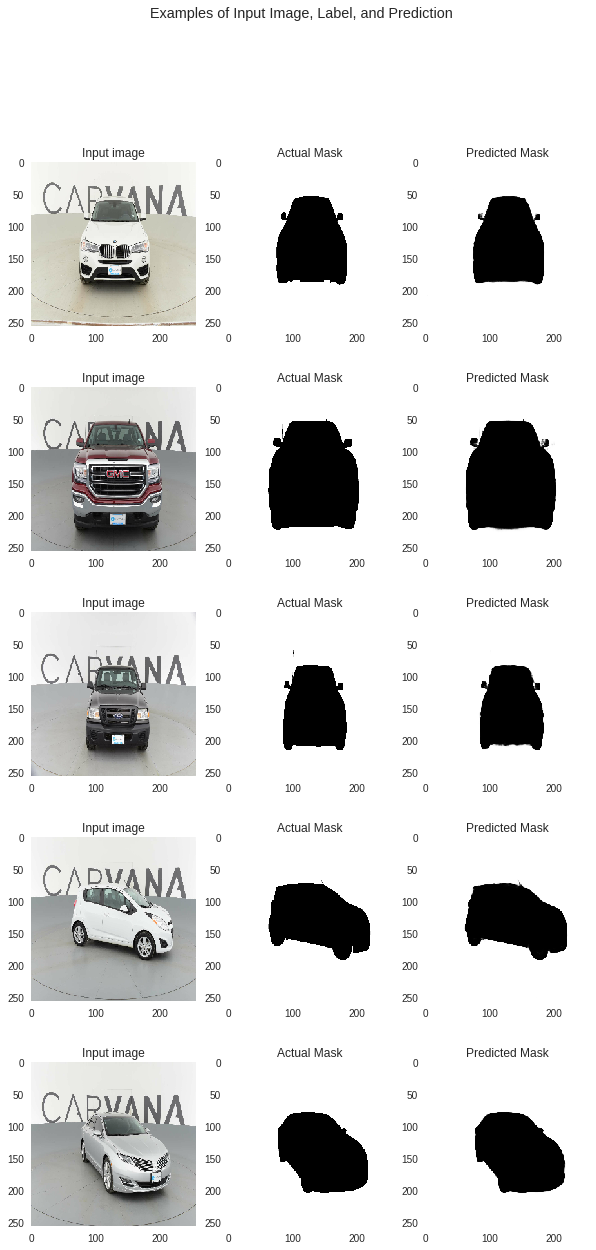

In [26]:
data_aug_iter = val_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
  batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
  img = batch_of_imgs[0]
  predicted_label = model.predict(batch_of_imgs)[0]

  plt.subplot(5, 3, 3 * i + 1)
  plt.imshow(img)
  plt.title("Input image")
  
  plt.subplot(5, 3, 3 * i + 2)
  plt.imshow(label[0, :, :, 0])
  plt.title("Actual Mask")
  plt.subplot(5, 3, 3 * i + 3)
  plt.imshow(predicted_label[:, :, 0])
  plt.title("Predicted Mask")
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()